# DESCRIPTIVE STATISTICS

# 1.0 DATA CLEANING

In [ ]:
# ! pip install --upgrade pip
# ! pip install missingno lazypredict scikit-optimize statsmodels axis utils.py

In [1]:
import pandas as pd
import missingno as msno
import utils as eda

In [2]:
df_original = pd.read_csv("./original_data.csv")

## 1.0.0. General information about dataset, including th number of rows and columns, missing values, and data types:

In [3]:
df_original.head(6)

,codigo_comunidad,comunidad,name,year,precio,IPC,edad_media,mano_obra,precio_Acero,precio_Aluminio,precio_Cemento,precio_Ceramica,precio_Cobre,precio_Energía,precio_Ligantes,precio_Madera,num_hipotecas,num_inmigracion
0,1,andalucia,Andalucía,2003-01-01,995.0,72.838,37.951542,313.00,719.9,725.8,1349.9,1227.4,558.2,2017.0,1453.9,1507.4,69821,205704
1,1,andalucia,Andalucía,2003-04-01,1033.0,74.225,37.951542,317.54,730.7,728.3,1343.7,1227.2,527.6,1940.9,1525.7,1507.2,57326,213822
2,1,andalucia,Andalucía,2003-07-01,1094.0,73.579,38.049990,315.92,724.4,704.8,1324.6,1226.0,541.2,1865.3,1517.8,1512.6,52571,221941
3,1,andalucia,Andalucía,2003-10-01,1133.0,74.736,38.049990,319.96,717.4,705.4,1331.2,1224.4,590.5,1817.3,1445.2,1512.9,63411,230060
4,1,andalucia,Andalucía,2004-01-01,1186.0,74.391,38.146028,319.41,735.7,711.7,1342.7,1226.0,689.3,1773.3,1262.8,1517.9,79923,238178
5,1,andalucia,Andalucía,2004-04-01,1268.0,76.236,38.146028,325.14,912.5,721.1,1373.4,1240.8,879.3,1824.5,1342.8,1521.8,82731,255542


In [4]:
df_original.shape

(1386, 18)

In [5]:
missing_values = df_original.isnull().sum()
missing_values

codigo_comunidad    0
comunidad           0
name                0
year                0
precio              0
IPC                 0
edad_media          0
mano_obra           0
precio_Acero        0
precio_Aluminio     0
precio_Cemento      0
precio_Ceramica     0
precio_Cobre        0
precio_Energía      0
precio_Ligantes     0
precio_Madera       0
num_hipotecas       0
num_inmigracion     0
dtype: int64

In [6]:
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1386 entries, 0 to 1385
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   codigo_comunidad  1386 non-null   int64  
 1   comunidad         1386 non-null   object 
 2   name              1386 non-null   object 
 3   year              1386 non-null   object 
 4   precio            1386 non-null   float64
 5   IPC               1386 non-null   float64
 6   edad_media        1386 non-null   float64
 7   mano_obra         1386 non-null   float64
 8   precio_Acero      1386 non-null   float64
 9   precio_Aluminio   1386 non-null   float64
 10  precio_Cemento    1386 non-null   float64
 11  precio_Ceramica   1386 non-null   float64
 12  precio_Cobre      1386 non-null   float64
 13  precio_Energía    1386 non-null   float64
 14  precio_Ligantes   1386 non-null   float64
 15  precio_Madera     1386 non-null   float64
 16  num_hipotecas     1386 non-null   int64  


## 1.0.1. Checking for duplicates in the dataset and removing them if necessary:

In [7]:
df_original.duplicated().sum()

np.int64(0)

In [8]:
df_original = df_original.drop_duplicates()
df_original.shape

(1386, 18)

## 1.0.2. Information about number of unique values in each column:

In [9]:
n_unique = df_original.nunique()
n_unique

codigo_comunidad      18
comunidad             18
name                  18
year                  77
precio               931
IPC                 1332
edad_media           702
mano_obra             77
precio_Acero          76
precio_Aluminio       73
precio_Cemento        76
precio_Ceramica       75
precio_Cobre          76
precio_Energía        77
precio_Ligantes       77
precio_Madera         77
num_hipotecas       1325
num_inmigracion     1370
dtype: int64

## 1.0.3. Null or empty values in each column:

In [10]:
df_original.isnull().sum()

codigo_comunidad    0
comunidad           0
name                0
year                0
precio              0
IPC                 0
edad_media          0
mano_obra           0
precio_Acero        0
precio_Aluminio     0
precio_Cemento      0
precio_Ceramica     0
precio_Cobre        0
precio_Energía      0
precio_Ligantes     0
precio_Madera       0
num_hipotecas       0
num_inmigracion     0
dtype: int64

In [11]:
df_original.isnull().mean() * 100

codigo_comunidad    0.0
comunidad           0.0
name                0.0
year                0.0
precio              0.0
IPC                 0.0
edad_media          0.0
mano_obra           0.0
precio_Acero        0.0
precio_Aluminio     0.0
precio_Cemento      0.0
precio_Ceramica     0.0
precio_Cobre        0.0
precio_Energía      0.0
precio_Ligantes     0.0
precio_Madera       0.0
num_hipotecas       0.0
num_inmigracion     0.0
dtype: float64

## 1.0.4. Missing values matrix:

<Axes: >

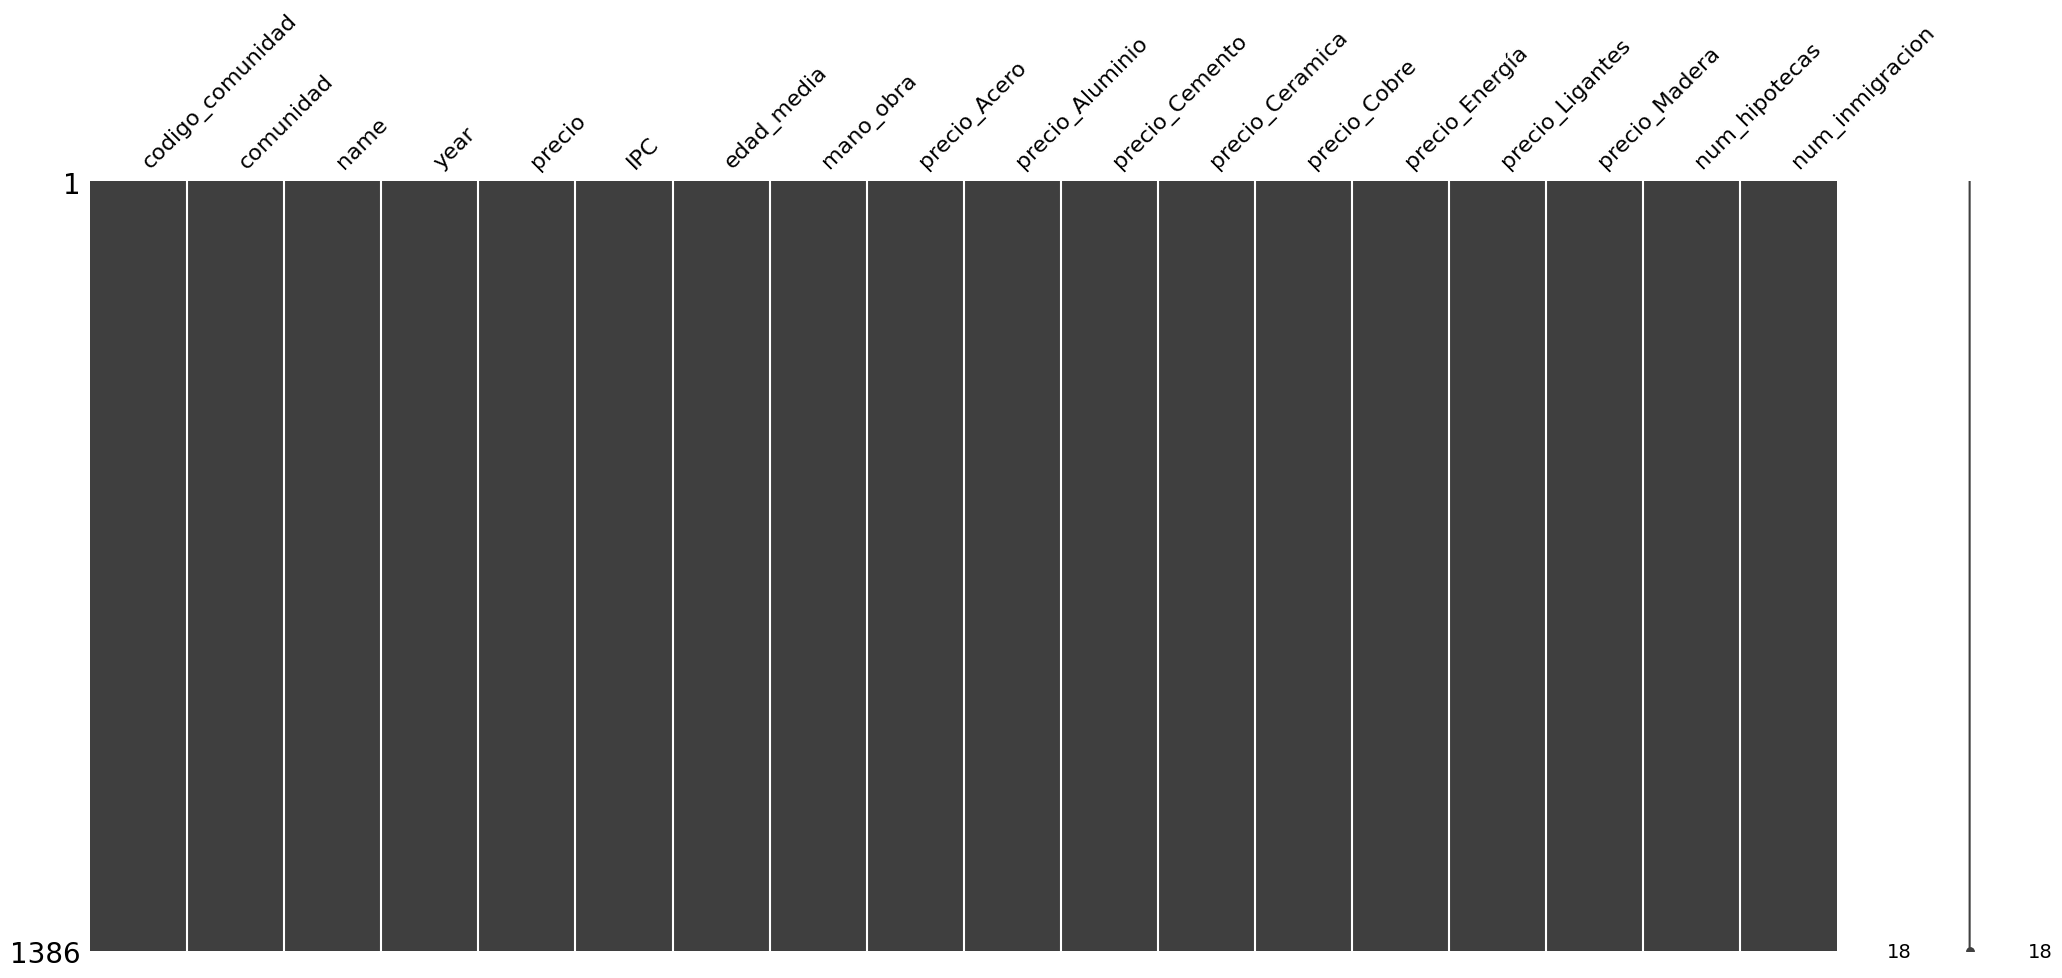

In [12]:
msno.matrix(df_original)

## 1.0.5. Delete unnecessary data: 

In [13]:
df_cleaned = df_original.drop(columns = ["codigo_comunidad", "name", "IPC", "edad_media", "mano_obra", "precio_Acero", "precio_Aluminio", "precio_Cemento", "precio_Ceramica", "precio_Cobre", "precio_Energía", "precio_Ligantes", "precio_Madera", "num_hipotecas", "num_inmigracion"])
df_cleaned

,comunidad,year,precio
0,andalucia,2003-01-01,995.0
1,andalucia,2003-04-01,1033.0
2,andalucia,2003-07-01,1094.0
3,andalucia,2003-10-01,1133.0
4,andalucia,2004-01-01,1186.0
...,...,...,...
1381,region-murcia,2021-01-01,1024.0
1382,region-murcia,2021-04-01,1027.0
1383,region-murcia,2021-07-01,1029.0
1384,region-murcia,2021-10-01,1043.0


In [14]:
df_cleaned.shape

(1386, 3)

# 1.1. Convert dates into years

In [15]:
df_cleaned["year"] = pd.to_datetime(df_cleaned["year"]).dt.year

In [16]:
df_cleaned

,comunidad,year,precio
0,andalucia,2003,995.0
1,andalucia,2003,1033.0
2,andalucia,2003,1094.0
3,andalucia,2003,1133.0
4,andalucia,2004,1186.0
...,...,...,...
1381,region-murcia,2021,1024.0
1382,region-murcia,2021,1027.0
1383,region-murcia,2021,1029.0
1384,region-murcia,2021,1043.0


# 1.2 Encode categorical variables as numerical

In [ ]:
# eda.label_encode_total_data(df_cleaned)

# 1.2. General information about measures of central tendency (mean, median, mode) and dispersion (standard desviation, variance, range, interquartile range) for each numerical column:

In [17]:
df_cleaned[["year", "precio"]].describe().T

,count,mean,std,min,25%,50%,75%,max
year,1386.0,2012.12987,5.560084,2003.0,2007.00,2012.0,2017.0,2022.0
precio,1386.0,1550.49062,533.627206,626.0,1121.25,1463.0,1866.5,3267.0


## 1.3. Remove outliers:

In [18]:
df_cleaned = eda.remove_outliers_igr(df_cleaned, ["year", "precio"])
df_cleaned.describe().T

,count,mean,std,min,25%,50%,75%,max
year,1363.0,2012.200293,5.578325,2003.0,2007.0,2012.0,2017.0,2022.0
precio,1363.0,1523.842993,496.634150,626.0,1120.0,1444.0,1847.0,2982.0


In [19]:
df_cleaned.shape

(1363, 3)

# 1.4. Histogram, boxplot and scatterplot of data distribution for each variable:

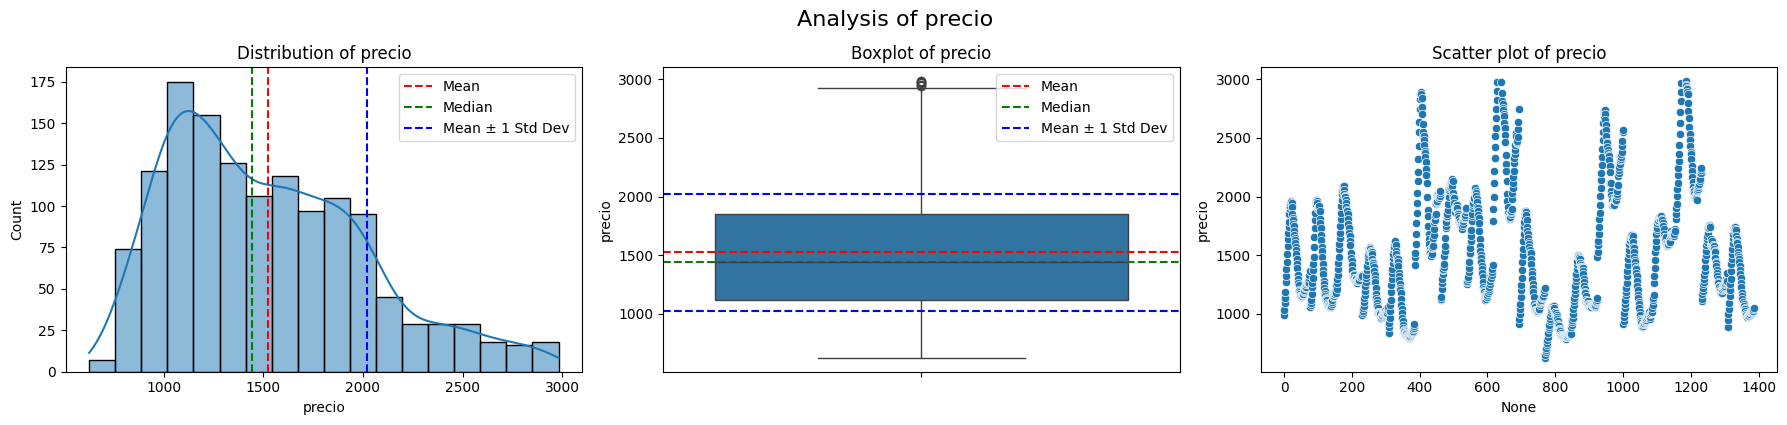

In [21]:
eda.plot_numerical_data(df_cleaned[["precio"]])

### CONCLUSIONS
1. Histogram (Distribution of price)
The distribution is skewed to the right, with most prices concentrated between 1000 and 2000. The mean is slightly above the median, indicating a positive bias.

2. Boxplot (Boxplot of price)
Prices show wide dispersion and some outliers above 3000. The median is close to the mean, but the interquartile range shows significant variability.

3. Scatter plot (Scatter plot of price)
Prices fluctuate considerably throughout the index, with no clear trend pattern. This suggests high variability and no correlation with the order of the data. The KDE curve is fine, but you could smooth it or adjust the width of the bars so that it does not look so irregular.

# 1.5. Save clean data on CSV

In [22]:
df_cleaned.to_csv("cleaned_data.csv")